In [1]:
%matplotlib inline
#%pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import scipy
from scipy import interpolate
import pandas as pd
import itertools
from root_numpy import root2array, root2rec, tree2rec, array2root
import ROOT
from ROOT import geo2d
geo2d.load_pyutil

__main__.geo2d::load_pyutil

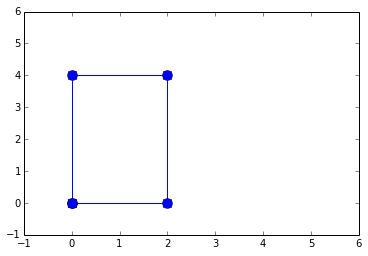

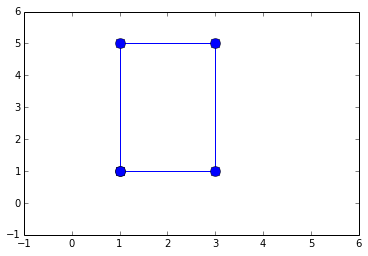

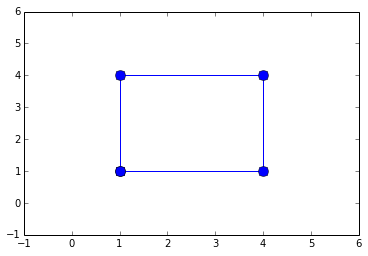

In [2]:
def plot_box(box,xmin=None,xmax=None,ymin=None,ymax=None,points=None):
    v=box.as_vector()
    ar=geo2d.as_ndarray64(v)
    
    data_x,data_y=[],[]
    for x in xrange(len(ar)/2):
        data_x.append(ar[2*x])
        data_y.append(ar[2*x+1])
    data_x.append(data_x[0])
    data_y.append(data_y[0])

    if points:
        plt.plot(points[0],points[1],color='r',marker='o',linestyle='',markersize=5)
    plt.plot(data_x,data_y,marker='o',markersize=10)
    ar=ar.reshape(4,2)
    if xmin is None: xmin = box.xmin()
    if ymin is None: ymin = box.ymin()
    if xmax is None: xmax = box.xmax()
    if ymax is None: ymax = box.ymax()
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.show()
    

geo2d.load_pyutil
k=geo2d.Vector2D("double")(0,0)
j=geo2d.Vector2D("double")(2,4)
b=geo2d.AABox("double")(k,j)
plot_box(b,-1,6,-1,6)
b.shift(1.,1.)
plot_box(b,-1,6,-1,6)
b.width(3.,3.)
plot_box(b,-1,6,-1,6)

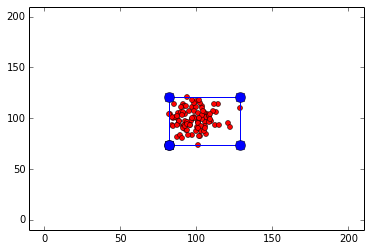

In [3]:
npts=100
data_x = np.random.normal(100, 10, npts)
data_y = np.random.normal(100, 10, npts)
stdx = ROOT.std.vector("double")(npts)
stdy = ROOT.std.vector("double")(npts)
for i in xrange(npts):
    stdx[i] = data_x[i]
    stdy[i] = data_y[i]

pts  = geo2d.Vector2DArray("double")(stdx,stdy)
aabb = geo2d.AABox("double")(pts)
plot_box(aabb,-10,210,-10,210,(data_x,data_y))